pearson相关系数：用于判断数据是否线性相关的方法。

注意：不线性相关并不代表不相关，因为可能是非线性相关。

Python计算pearson相关系数：

1. 使用numpy计算（corrcoef），以下是先标准化再求相关系数

In [16]:
import numpy as np
import pandas as pd

aa = np.array([2,3,9,6,8])
bb = np.array([5,6,3,7,9])
cc = np.array([aa, bb])
print(cc)
df = pd.read_excel('data.xlsx',sheet_name='因子分析2',header=0,index_col='编号')
print(df)
cc = np.array(df.iloc[:,2:6]).T
print(cc)
cc_mean = np.mean(cc, axis=0)  #axis=0,表示按列求均值 ——— 即第一维
cc_std = np.std(cc, axis=0)
cc_zscore = (cc-cc_mean)/cc_std   #标准化

cc_zscore_corr = np.corrcoef(cc_zscore)  #相关系数矩阵
print(cc_zscore_corr)

[[2 3 9 6 8]
 [5 6 3 7 9]]
     有机含量   黏土矿物  FeS2   碳酸盐   SiO2  Fe2O3  Al2O3   CaO   MgO
编号                                                           
1   86.76  12.25  0.00  0.40  46.20   5.26  34.55  3.58  1.30
2   92.52   7.32  0.00  0.16  47.52   3.68  37.70  1.95  0.59
3   96.79   3.07  0.17  0.00  47.86   7.82  36.77  1.38  0.63
4   85.56  13.03  0.94  0.47  45.04   7.44  36.06  3.43  0.65
5   87.75  10.26  1.23  0.76  36.22  24.29  29.25  3.23  1.15
6   75.69  24.06  0.00  2.50  47.40   3.76  40.00  0.97  1.15
7   99.21   0.63  0.16  0.00  86.62   8.87  31.75  2.82  0.96
8   84.50  14.46  1.04  0.00  46.94  14.59  37.35  2.20  0.89
9   94.14   5.86  0.00  0.00  48.66   8.41  38.42  0.51  0.67
10  90.50   6.72  2.78  0.00  35.18   1.58  30.11  0.51  0.59
11  72.05  26.49  1.46  0.00  49.04   5.19  39.28  0.05  0.74
12  98.10   1.71  0.00  0.00  54.22   5.79  32.04  1.33  0.63
13  96.35   3.13  0.26  0.00  44.76  36.54  36.20  0.67  0.70
14  98.48   0.00  1.08  0.44  28.60  17.67 

2. 使用pandas计算相关系数

In [7]:
cc_pd = pd.DataFrame(cc_zscore.T, columns=['c1', 'c2'])
cc_corr = cc_pd.corr(method='spearman')   #相关系数矩阵

In [8]:
print(cc_corr['c1'])  #某个因子与其他因子的相关系数

c1    1.0
c2   -1.0
Name: c1, dtype: float64


pearson相关系数的计算公式为：
cov(X,Y)表示的是协方差

var(x)和var(y)表示的是方差
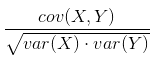

In [9]:
# pandas计算协方差

print(cc_pd.c1.cov(cc_pd.c2))   #协方差
print(cc_pd.c1.corr(cc_pd.c2))  #两个因子的相关系数
y_cov = cc_pd.cov()     #协方差矩阵



-0.8000000000000002
-1.0
